# Gradient

Gradient skalárneho pola $f(x,y,z)$ vo zvolenom bode $(x,y,z)$ je definovaný ako vektor, udávajúci smer najväčšej zmeny skalárneho poľa a jeho veľkosť je úmerná tejto zmene. Všeobecný vzťah pre výpočet gradientu v kartézskych súradniciach je definovaný ako 

\begin{equation}
\nabla f =  \frac{\partial f}{\partial x} \mathbf{i} + \frac{\partial f}{\partial y} \mathbf{j}  +  \frac{\partial f}{\partial z} \mathbf{k}
\end{equation}

## Gradient v cylindrických súradniciach

\begin{equation}
\nabla {f} = {\partial f \over \partial r}\boldsymbol{r} 
  + {1 \over r}{\partial f \over \partial \varphi}\boldsymbol{\varphi} 
  + {\partial f \over \partial z}\boldsymbol{z}
\end{equation}

## Gradient v sférických súradniciach

\begin{equation}
\nabla {f} = {\partial f \over \partial r}\boldsymbol{r} 
  + {1 \over r}{\partial f \over \partial \theta}\boldsymbol{\theta} 
  + {1 \over r\sin\theta}{\partial f \over \partial \varphi}\boldsymbol{\varphi}
\end{equation}

## Vlastnosti gradientu

Ak $\mathbf{F}, \mathbf{G}$ sú vektorové polia, $f,g$ sú skalárne polia, $a, b$ sú reálne čísla, potom operátor gradientu spĺňa nasledujúce identity:

- je lineárny voči reálnym čislam

\begin{equation*}
\nabla\left(af+bg\right) = a\nabla f + b\nabla g 
\end{equation*}

- spĺňa Leibnizovo pravidlo (derivácia súčinu)

\begin{equation*}
\nabla\left(fg\right) = \left(\nabla f\right) g + f\nabla g
\end{equation*}


- gradient skalárneho súčinu vektorov

\begin{equation*}
\nabla\left(\mathbf{F}\cdot\mathbf{G}\right)=\nabla\mathbf{F}\cdot\mathbf{G}+\nabla\mathbf{G}\cdot\mathbf{F}
\end{equation*}

kde pod $\nabla\mathbf{F}$ rozumieme maticu a výsledok ako stĺpcový vektor (**TODO** dokázať)

## Symbolický výpočet 

Pomocou knižnice *sympy* určime gradient skalárnej funkcie

\begin{equation*}
f(x,y) = (x^2 + y) \, \sin(y)
\end{equation*}

a jeho hodnotu v bode $(x,y)=(2,4)$.
<!-- MEDSKIP -->

In [2]:
%reset -sf 
from utils.utils import *
from sympy import *
from sympy.vector import CoordSys3D, gradient

r = CoordSys3D('r')
f = (r.x**2 + r.y) * sin(r.y)       # skalarna funkcia f(x,y) 
G = gradient(f)                     # vypocet gradientu

ltxprint(r'\nabla f(x,y)', G)

<IPython.core.display.Latex object>

Výpočet hodnôt zložiek vektora gradientu v bode $(x,y)=(2,4)$

In [3]:
gxy = G.subs([(r.x, 2), (r.y, 4)])
print('Grad f(2,4) = {0} {1}'.format(gxy, gxy.evalf(3)))

Grad f(2,4) = (4*sin(4))*r.i + (8*cos(4) + sin(4))*r.j (-3.03)*r.i + (-5.99)*r.j


## Numerický výpočet

V *numpy* je možné pre výpočet gradientu n-rozmernej skalárnej funkcie použiť funkciu *gradient()*. Funkcia vráti vektorové pole, ktoré môžeme v 2D zobraziť pomocou funkcie *quiver()*, šipky smerujú v smere stúpajúcej hodnoty. 
<!-- MEDSKIP -->


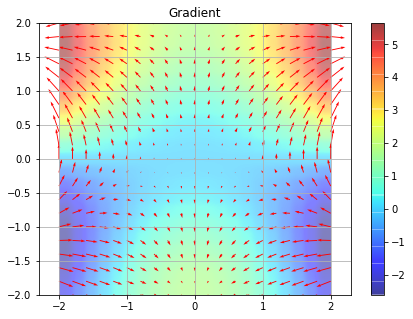

In [5]:
%reset -sf 
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np                    

dx = np.arange(-2, 2.2, .2)
dy = np.arange(-2, 2.2, .2)
x,y = np.meshgrid(dx, dy)   

fn = (x**2 + y) * np.sin(y)
gy, gx = np.gradient(fn)

fig = plt.figure(figsize=(7,5)) 
ax = fig.add_subplot(111)
ax.quiver(x, y, gx, gy, color='r')
img = ax.imshow(fn, extent=[-2, 2, -2, 2], 
                origin='lower', interpolation='kaiser', 
                clip_on=True, alpha=0.5, cmap='jet') 
fig.colorbar(img)
plt.axis('equal')
plt.title('Gradient')
plt.grid()
plt.show()